In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv", header=None)
data.columns = [
    'Sex', 
    'Length', 
    'Diameter', 
    'Height', 
    'Whole weight', 
    'Shucked weight', 
    'Viscera weight', 
    'Shell weight', 
    'Rings'
]
data['Sex'] = data['Sex'].map({'M': 'Male', 'F': 'Female', 'I': 'Infant'})


### 1 point

In [3]:
counted = data['Sex'].value_counts()
counted_df = pd.DataFrame({
    'count' : counted,
    '%': (counted / counted.sum() * 100).round(2)
})
counted_df.index.name = ""
counted_df

,count,%
,,
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


### 2 point

In [4]:
summary_stats = data.describe().T
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


### 3 point
there is only one qualitative variable: sex

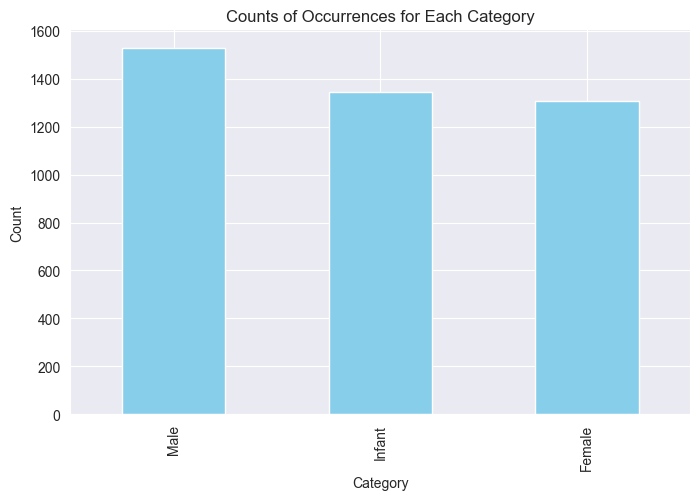

In [5]:
counts = data['Sex'].value_counts()

plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Occurrences for Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


### 4 point

In [6]:
quantitative_variables = data.drop(columns='Sex')

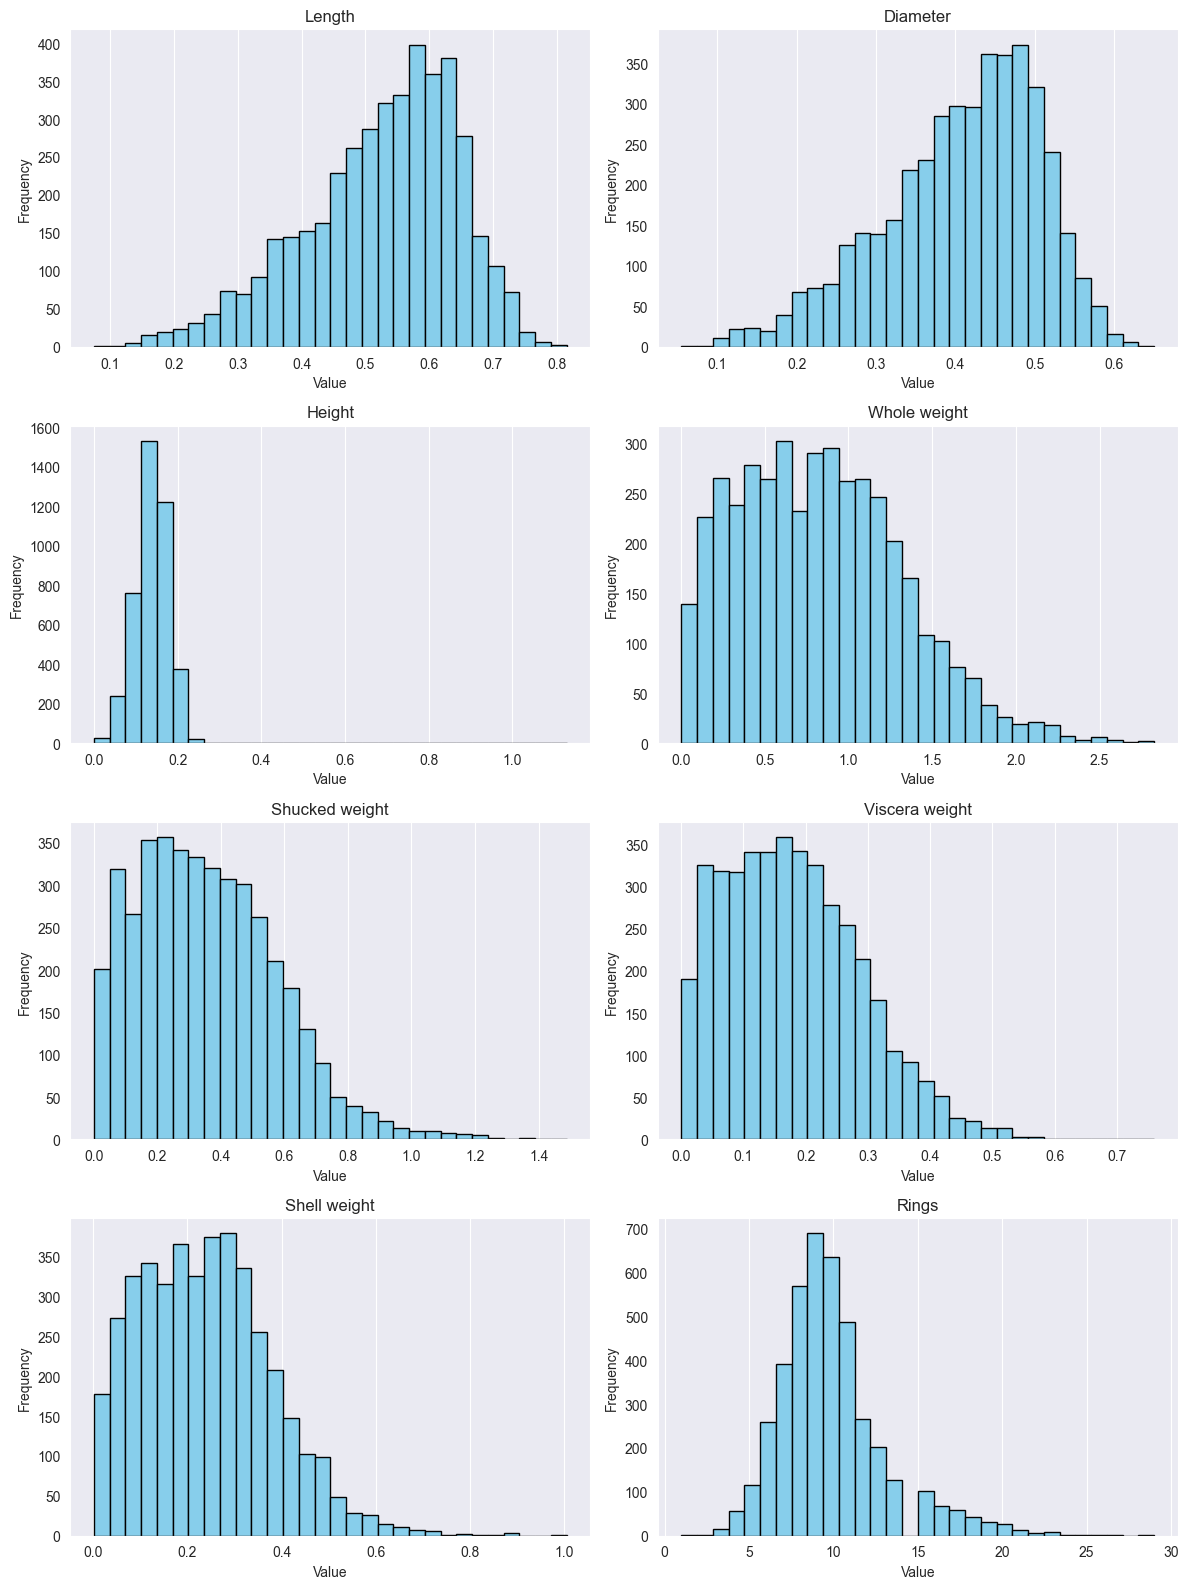

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()
for i, var in enumerate(quantitative_variables):
    axes[i].hist(data[var], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()

### 5 point

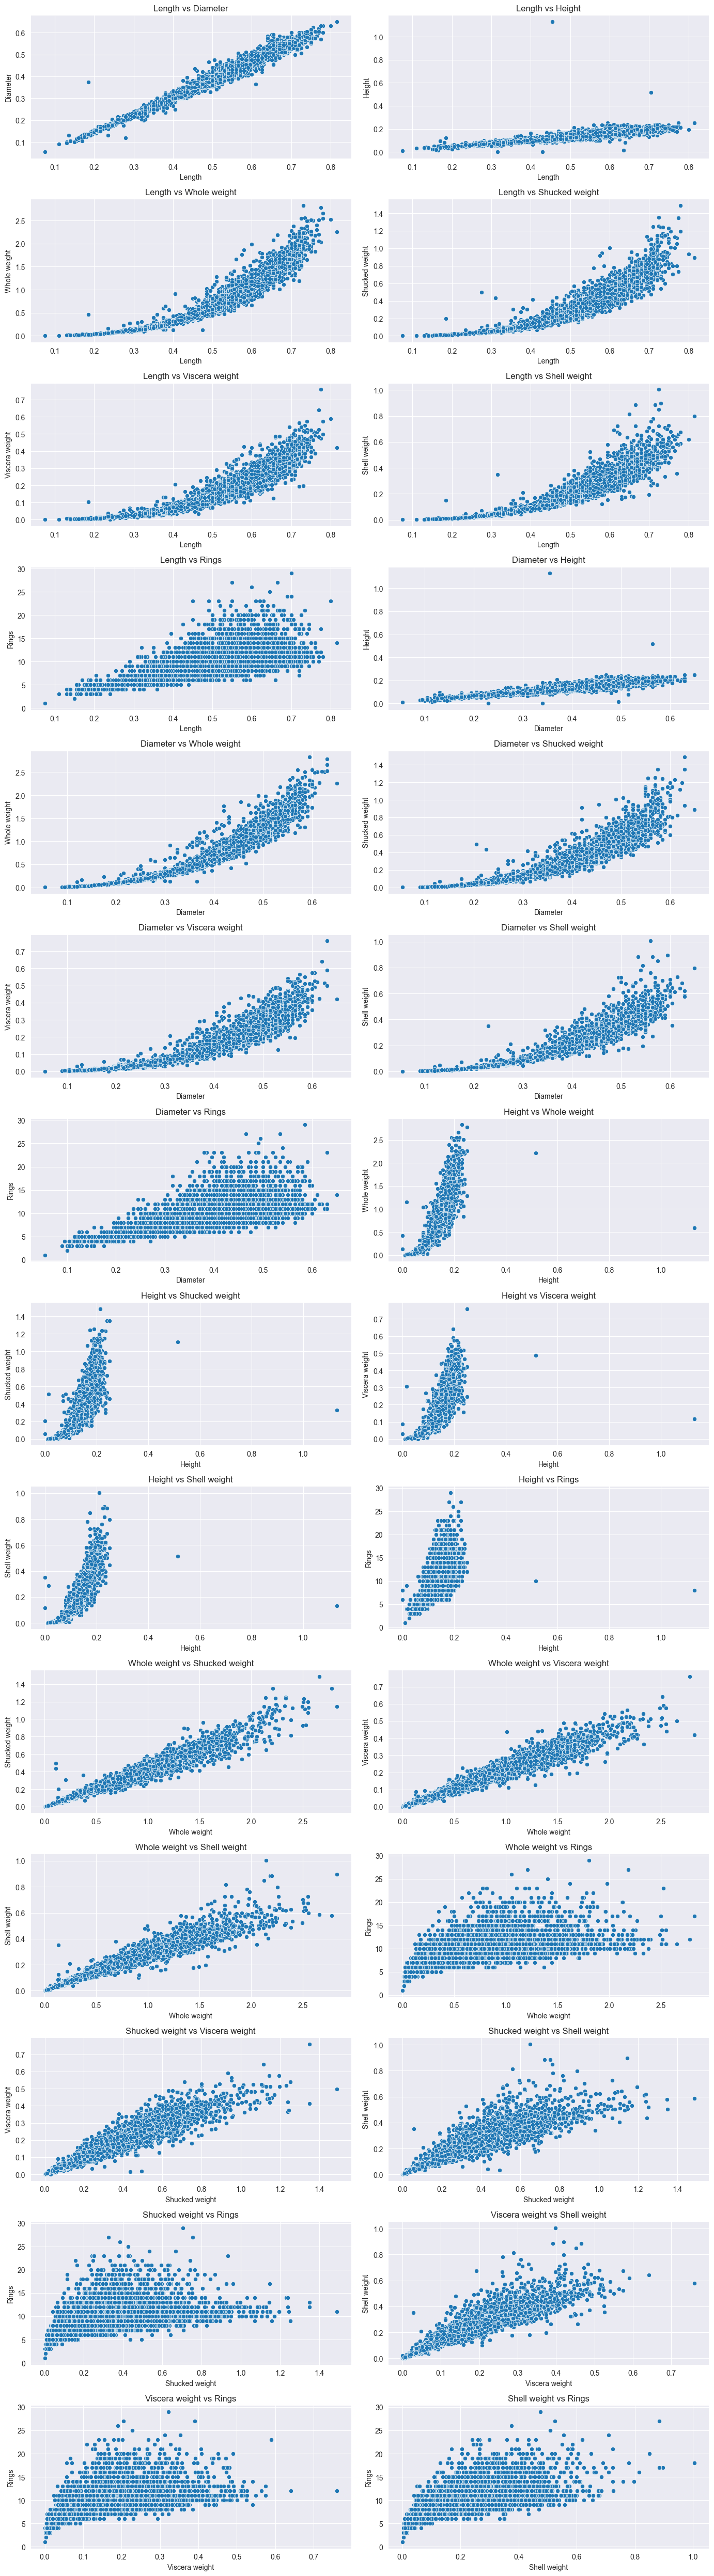

In [8]:
quantitative_vars = quantitative_variables.columns
fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(14, 50)) 
axes = axes.flatten()
plot_index = 0
for i in range(len(quantitative_vars)):
    for j in range(i + 1, len(quantitative_vars)):
        sns.scatterplot(x=data[quantitative_vars[i]], y=data[quantitative_vars[j]], ax=axes[plot_index])
        axes[plot_index].set_title(f'{quantitative_vars[i]} vs {quantitative_vars[j]}')
        plot_index += 1
        if plot_index >= len(axes):
            break
plt.tight_layout()
plt.show()

### 6 point

In [9]:
correlation_matrix = quantitative_variables.corr()
display(correlation_matrix)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


### 7 point 

In [10]:
def custom_format(x):
    if x.is_integer(): 
        return f"{int(x)}"
    else:
        return f"{x:.5f}"

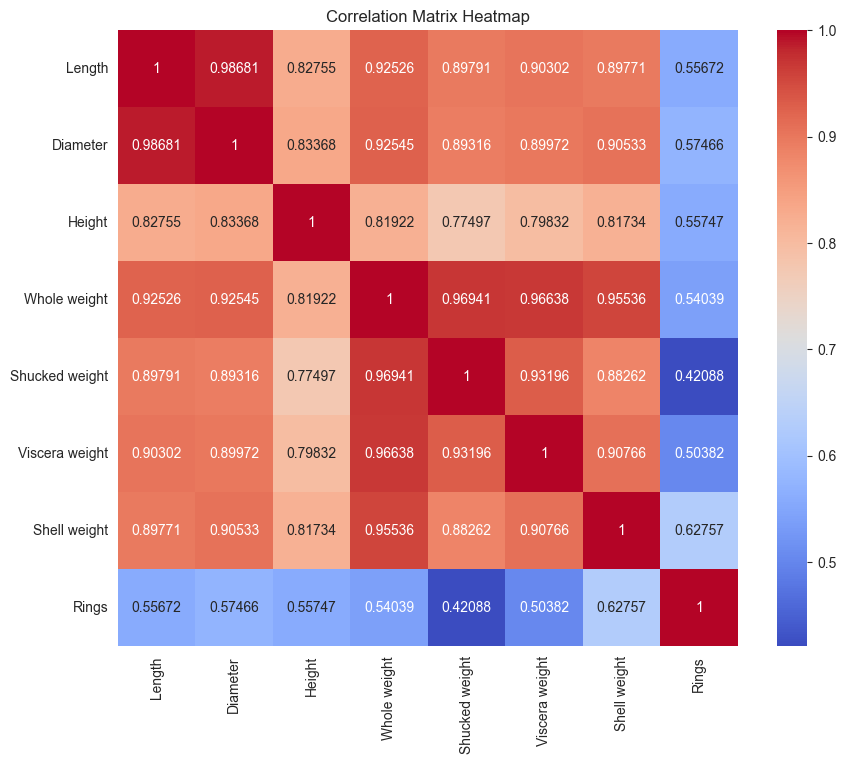

In [11]:
plt.figure(figsize=(10, 8))
annotations = correlation_matrix.map(custom_format)
sns.heatmap(
    correlation_matrix,
    annot=annotations,
    cmap='coolwarm',
    fmt=""
)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 8 point

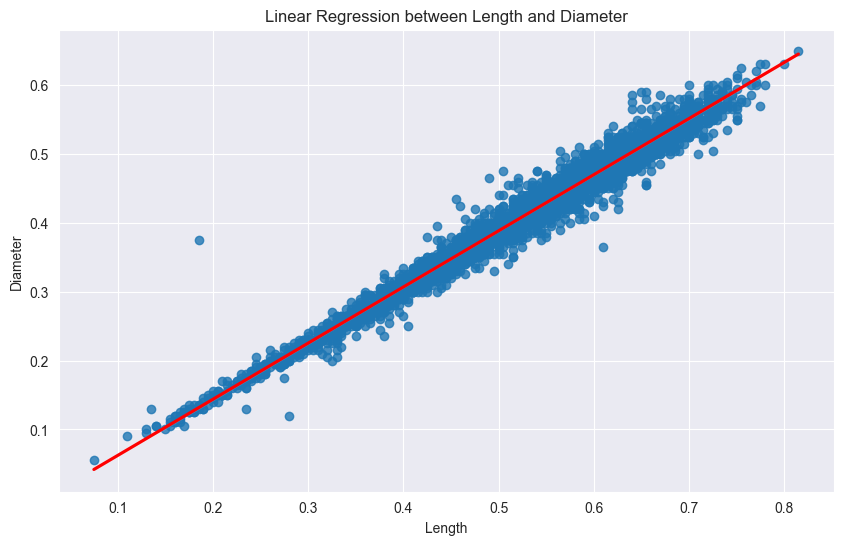

In [12]:
x_variable = "Length"
y_variable = "Diameter"
plt.figure(figsize=(10, 6))
sns.regplot(x=x_variable, y=y_variable, data=data, line_kws = {'color' : 'red'})

plt.title(f'Linear Regression between {x_variable} and {y_variable}')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.show()